<a href="https://colab.research.google.com/github/Apolinar1o/IcMachinaLearning/blob/main/IcLimed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

F1 score: 1.00
Accuracy: 1.00


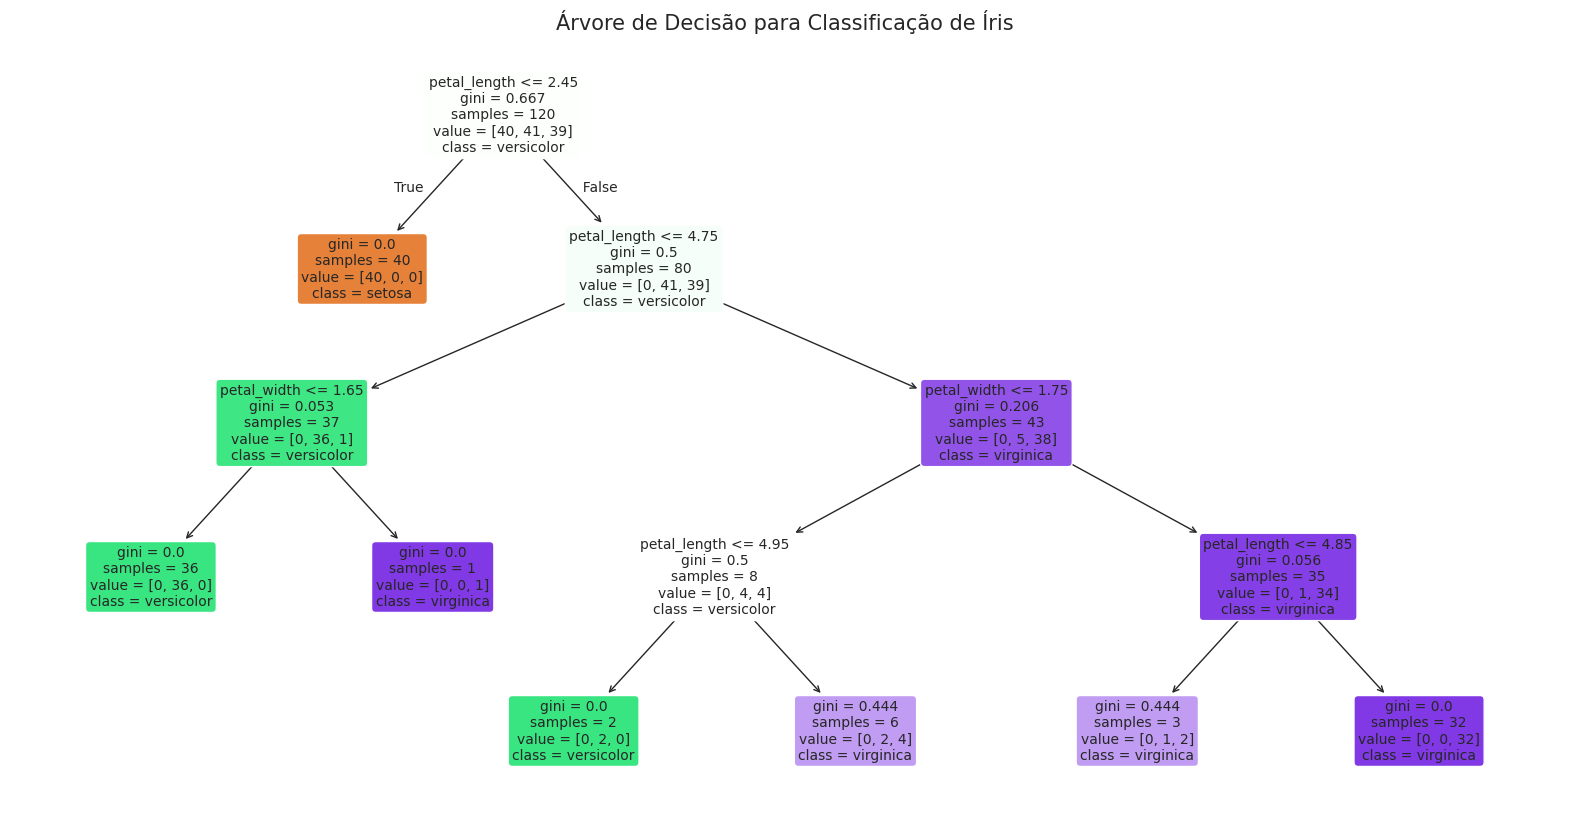

In [ ]:
#dataset iris comm arvore de decisao
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score


df = sns.load_dataset("iris").dropna()

x = df[["sepal_length", "sepal_width", "petal_length", "petal_width"]]
y = df["species"]


X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)


dt_classifier = DecisionTreeClassifier(max_depth=4, random_state=42)

dt_classifier.fit(X_train, Y_train)


Y_pred = dt_classifier.predict(X_test)


print(f"F1 score: {f1_score(Y_test, Y_pred, average='macro'):.2f}")


print(f"Accuracy: {accuracy_score(Y_test, Y_pred):.2f}")


plt.figure(figsize=(20, 10))

plot_tree(dt_classifier,
          filled=True,
          feature_names=x.columns,
          class_names=dt_classifier.classes_,
          rounded=True,
          fontsize=10) # Ajuste o tamanho da fonte se necessário

plt.title("Árvore de Decisão para Classificação de Íris", fontsize=15)


plt.show()

In [ ]:
#fazendo o aodigo para random Forest


from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd

iris = datasets.load_iris()


x = iris.data
y = iris.target

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.5, random_state=0)

sc  = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

paramentros = {'n_estimators': [10,50, 100, 500, 1000], 'criterion': ['gini', 'entropy']}

modelo = GridSearchCV(RandomForestClassifier(), paramentros, cv=5)

modelo.fit(X_train_std, Y_train)
#forest = RandomForestClassifier(criterion='entropy', n_estimators = 100, random_state=1, n_jobs=2)

#forest.fit(X_train_std, Y_train)

Y_pred = modelo.predict(X_test_std)

print("accuracy: ", 100*accuracy_score(Y_test, Y_pred))


accuracy:  96.0


In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()


x = iris.data
y = iris.target

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.5 ,random_state=1)

sc = StandardScaler()

X_train_st = sc.fit_transform(X_train)
X_test_st = sc.fit_transform(X_test)

gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.01, max_depth=3)

gb.fit(X_train_st, Y_train)

Y_pred = gb.predict(X_test_st)

print("accuracy: ", 100*accuracy_score(Y_test, Y_pred))



accuracy:  96.0


In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

iris = datasets.load_iris()

x = iris.data
y = iris.target

X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.5, random_state=1)

sc = StandardScaler()

X_train_st = sc.fit_transform(X_train)
x_test_st = sc.fit_transform(X_test)

paramentros = {'n_estimators': [10,50,100, 500, 1000], 'max_depth': [3,4,5,6,7,8], 'min_child_samples': [5,10,15,], 'num_leaves': [10,20,30]}


model = GridSearchCV(lgb.LGBMClassifier(), paramentros, cv=5)
model.fit(X_train_st, Y_train)
Y_pred = model.predict(x_test_st)


print("Acurácia LightGBM:", 100 * accuracy_score(Y_test, Y_pred))


Acurácia LightGBM: 89.33333333333333


,Model,Accuracy,Precision,Recall,F1-Score
0,Decision Tree,1.0,1.0,1.0,1.0
1,Random Forest,1.0,1.0,1.0,1.0
2,Gradient Boosting,1.0,1.0,1.0,1.0
3,XGBoost,1.0,1.0,1.0,1.0
4,LightGBM,1.0,1.0,1.0,1.0
5,KNN,1.0,1.0,1.0,1.0
6,SVM,1.0,1.0,1.0,1.0


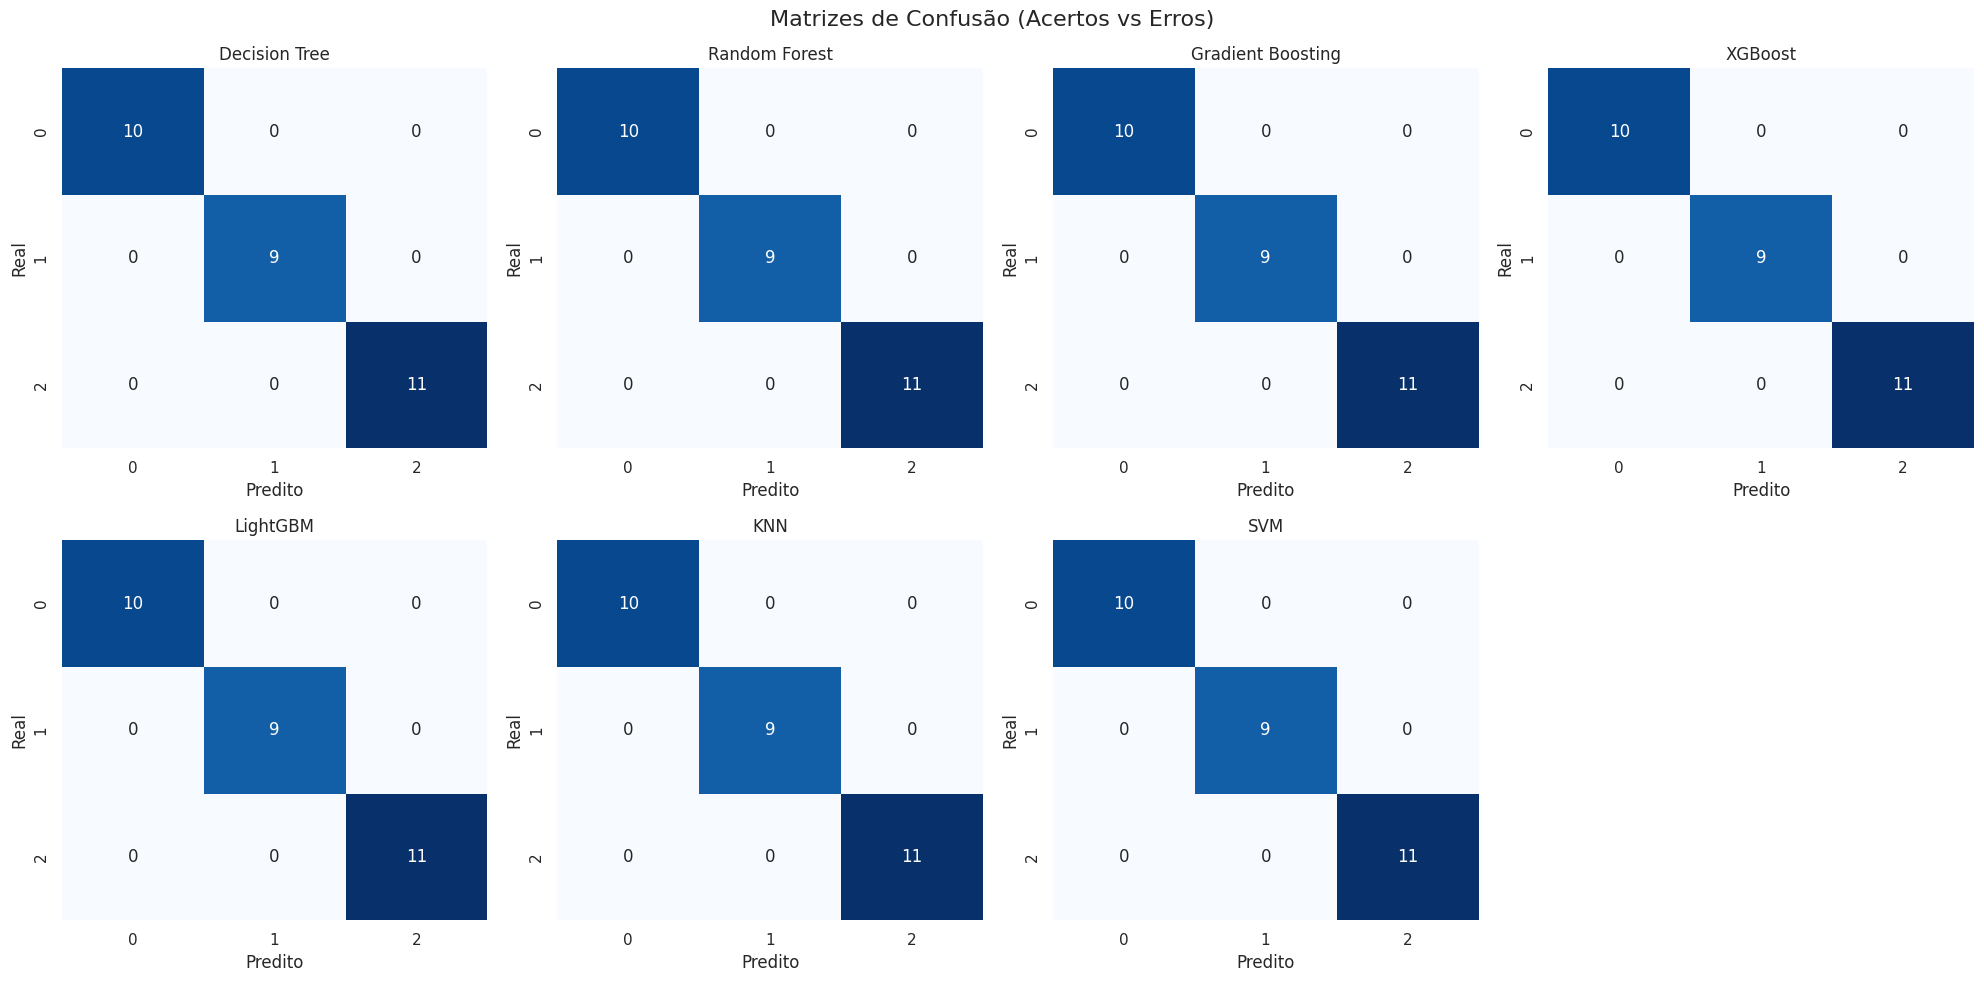

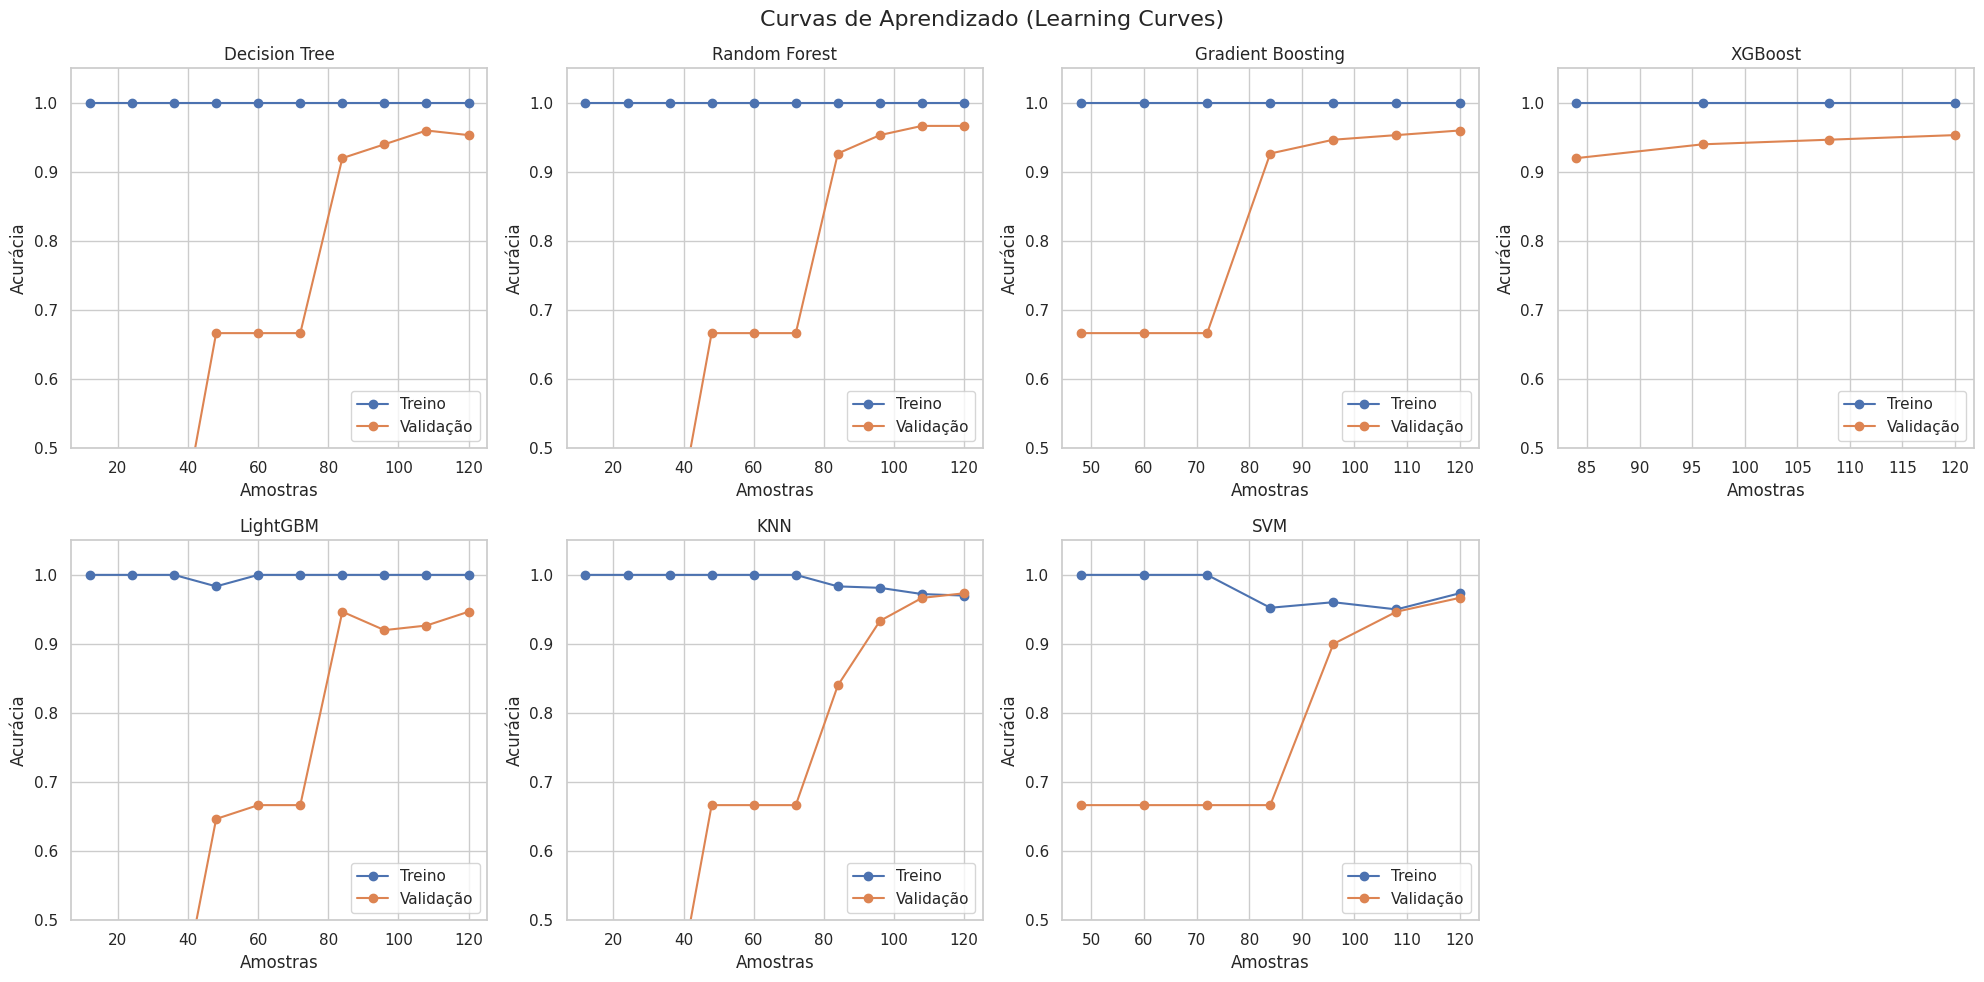

In [ ]:
#codigo completo de todas que eu vi o video
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
import lightgbm as lgb
import warnings

warnings.filterwarnings('ignore')
sns.set_theme(style='whitegrid')

# Carregar dados
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": xgb.XGBClassifier(eval_metric='mlogloss', use_label_encoder=False, random_state=42),
    "LightGBM": lgb.LGBMClassifier(verbose=-1, random_state=42),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(random_state=42)
}

results = []
conf_matrices = {}

# Metricas
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='macro'),
        'Recall': recall_score(y_test, y_pred, average='macro'),
        'F1-Score': f1_score(y_test, y_pred, average='macro')
    })

    conf_matrices[name] = confusion_matrix(y_test, y_pred)


df_results = pd.DataFrame(results)
display(df_results)

# Matrizes de Confusão
plt.figure(figsize=(20, 10))
plt.suptitle("Matrizes de Confusão (Acertos vs Erros)", fontsize=16)

for i, (name, cm) in enumerate(conf_matrices.items()):
    plt.subplot(2, 4, i+1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(name)
    plt.xlabel('Predito')
    plt.ylabel('Real')

plt.tight_layout()
plt.show()

#curvas
plt.figure(figsize=(20, 10))
plt.suptitle("Curvas de Aprendizado (Learning Curves)", fontsize=16)

for i, (name, model) in enumerate(models.items()):

    plt.subplot(2, 4, i+1)
    train_sizes, train_scores, val_scores = learning_curve(
        model, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
    )

    train_mean = np.mean(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)

    plt.plot(train_sizes, train_mean, label='Treino', marker='o')
    plt.plot(train_sizes, val_mean, label='Validação', marker='o')
    plt.ylim(0.5, 1.05)
    plt.title(name)
    plt.xlabel('Amostras')
    plt.ylabel('Acurácia')
    plt.legend(loc='lower right')
    plt.grid(True)

plt.tight_layout()
plt.show()